In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd

#preview the data
iris = load_iris()

for key,value in iris.items():
    try:
        print(key,value.shape)
    except:
        print(key)

feature_names
DESCR
data (150, 4)
target_names (3,)
target (150,)


* ('target_names', (3L,))	共有三種鳶尾花 setosa, versicolor, virginica
* ('data', (150L, 4L))	有150筆資料，共四種特徵
* ('target', (150L,))	這150筆資料各是那一種鳶尾花
* DESCR	資料之描述
* feature_names	四個特徵代表的意義

In [45]:
#data
x = iris.data[:,:2]  #150行資料全取，特徵本來有四列，取兩列
n_features = X.shape[1]  #shape查詢矩陣維度，150行2列（150,2），2列的部分是剛剛取的特徵，其實就是查特徵數量
y = iris.target
df = pd.DataFrame(x,y)
df.describe()  #可以看到第一個特徵的數值介於4~8之間，第二個特徵介於2~5之間 （待會製作全部排列組合用得到）

,0,1
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [46]:
#classifiers
classifiers = {'L1 Logistic':LogisticRegression(C=1, penalty='l1'),
              'L2 Logistic (OvR)':LogisticRegression(C=1, penalty='l2'),
              'Linear SVC':SVC(kernel='linear', C=1, probability=True, random_state=0),
              'L2 Logistic (Multinomial)':LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial'),}
n_classifiers = len(classifiers)


* 接下來要創建一個測試矩陣，將所有取的特徵所可能的所有排列組合用網格矩陣排列出來。就像之前學matplotlib class12畫等高線
* 新學函式.ravel()  ＃翻譯：反芻？？？  
* 新學函式numpy.c_ 為numpy特殊物件，能協助將numpy 陣列連接起來，將程式簡化後，我們用以下範例展示相關函式用法。

In [47]:
#建立所有排列組合的網格矩陣，舉例：

xx = np.linspace(1,3,3)  #就是[[1,2,3],]  1行三列矩陣
yy = np.linspace(4,6,3)  #[[4,5,6],]
print(xx)
print('--------------------')
print(yy)
print('=============================')

xx, yy = np.meshgrid(xx,yy)
print(xx)
print('--------------------')
print(yy)
print('=============================')

#再將兩個矩陣’反芻‘，拉直，再用.c函式連接起來
test_full = np.c_[xx.ravel(), yy.ravel()]
print(test_full)  #可以看到矩陣是xx和yy所有數值的全部可能組合

[ 1.  2.  3.]
--------------------
[ 4.  5.  6.]
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]
--------------------
[[ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]]
[[ 1.  4.]
 [ 2.  4.]
 [ 3.  4.]
 [ 1.  5.]
 [ 2.  5.]
 [ 3.  5.]
 [ 1.  6.]
 [ 2.  6.]
 [ 3.  6.]]


In [48]:
#建立 特徵的網格矩陣(xx第一特徵數值4~8之間，yy第二特徵數值2~5之間)


xx = np.linspace(4,8,100)
yy = np.linspace(2,5,100)

xx, yy = np.meshgrid(xx,yy)

features_full = np.c_[xx.ravel(), yy.ravel()]

classifer_rate for Linear SVC : 0.866667


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 45


classifer_rate for L1 Logistic : 0.755556
classifer_rate for L2 Logistic (Multinomial) : 0.777778
classifer_rate for L2 Logistic (OvR) : 0.666667


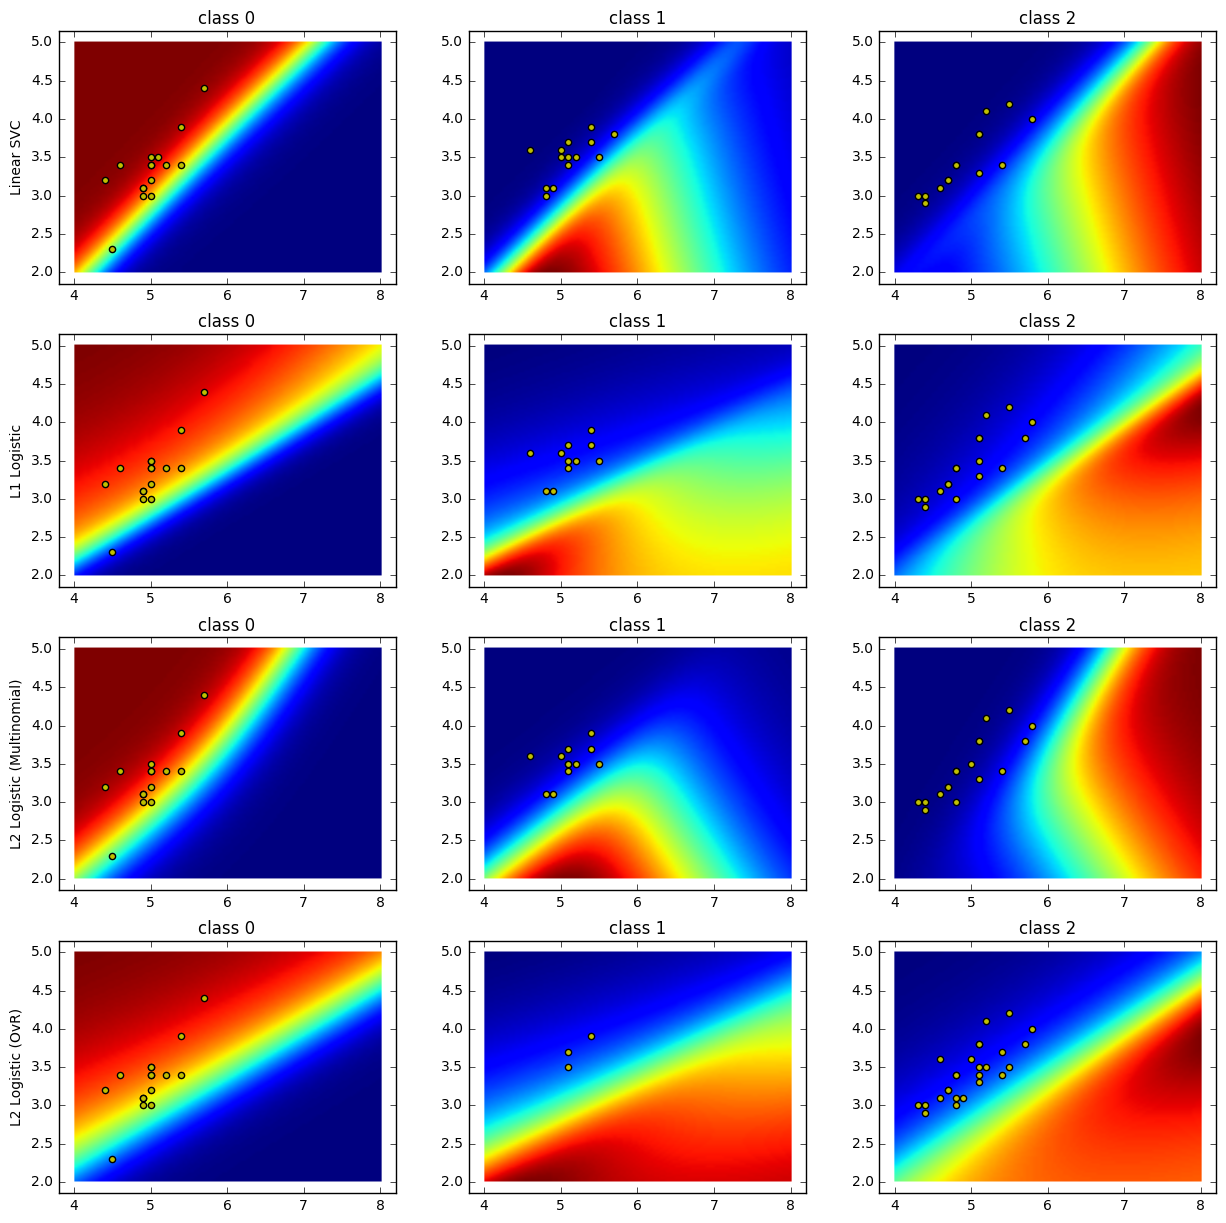

In [74]:
#訓練分類器
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3) 


plt.figure(figsize=(15,15), dpi=300)

for index,(name, classifier) in enumerate(classifiers.items()):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    classifier_rate = np.mean(y_pred.ravel() == y_test.ravel()) #這裡的==是兩個矩陣比較，會回傳bool，True會是1,False是0，再平均
    print('classifer_rate for %s : %f'%(name,classifier_rate))
    
    #特徵網格的數據帶入
    probas = classifier.predict_proba(features_full)
    n_classes = np.unique(y_pred).size    #其實就是預測出來有幾種類別，資料裡面就可以看到其實就最多3類別的iris，就是比較嚴謹的寫法。
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k +1) # subplot(行，列，第幾個圖-從1開始)
        plt.title('class %d' %k)
        if k == 0:
            plt.ylabel(name)
        
        #繪出probas矩陣中，類別 k(0,1,2)各自機率，extent(x軸下限,x軸上限,y軸下限,y軸上限)
        imshow_handle = plt.imshow(probas[:,k].reshape(100,100), extent=(4,8,2,5), origin='lower')
        
        #這段畫點的部分看不懂
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='y')


#ax = plt.axes([0.15, 0.04, 0.7, 0.05])  #備註長條圖left,bottom圖表起始位置（距離y軸，距離x軸），width,height圖表跟原尺寸比例
#plt.title("Probability")
#plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()